In [104]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy as sp

Step 1: Define the Lattice Structure
- Lattice Shape (number indicates a dipole exists, 0 indicates no dipole)
- Spin states (each dipole will be represented by an entry in the lattice with a value of either +1 or -1)

Step 2: Hamiltonian Construction

- The hamiltonian describes the total energy of the system, accounting for interactions between neightboring spins. The enerrgy interaction between two neightboring spins is typically proportional to the product of their spin states (i.e. $H = -J\sum S_iS_j$, where $J$ is a coupling constant and $S_i$ and $S_j$ are the spin states of neighbors.)
- Once lattice is constructed, we need to filter out which dipoles are neighbors. For a 2D array, a dipole can interact with its left, right, top, below, top right, top left, bottom right, bottom left neighbors.

Step 3: Calculate total energy

- Use $H = -J\sum S_iS_j$ formula and sum up the energy contributions from every dipole in the lattice to determine the "total energy"

In [105]:
def lattice_generator(x, N, M):
    bits = N * M
    # Convert integer x to binary representation, zero-padded to fit N*M bits
    if len(bin(x)[2:]) > bits:
        sys.exit("Error: Maximum is greater than lattice shape. Please try a lower maximum.")
    return np.array([int(i) for i in bin(x)[2:].zfill(bits)])

def hamiltonian_boundary(spin_lattice, J):
    total_energy = 0
    rows, cols = spin_lattice.shape

    for i in range(rows):
        for j in range(cols):
            # Consider only if the current index is a spin
            if spin_lattice[i][j] != 0:
                # Neighbors with periodic boundary conditions
                neighbors = [
                    ((i + 0) % rows, (j + 1) % cols),  # Right
                    ((i + 1) % rows, (j + 0) % cols),  # Down
                    ((i + 1) % rows, (j + 1) % cols),  # Down-Right
                ]
                for ni, nj in neighbors:
                    total_energy += -J * spin_lattice[i][j] * spin_lattice[ni][nj]

    return total_energy

# Lattice size
N = 3
M = 3
maximum = 511 #2^9-1

bit_string = lattice_generator(0, N, M) 
spin_lattice = bit_string.reshape(N, M)
spin_lattice = np.where(spin_lattice == 0, 1, -1) # Convert 0 to 1 (up spin) and 1 to -1 (down spin)

J = 1
total_energy = hamiltonian_boundary(spin_lattice, J)

print("Spin Lattice:\n", spin_lattice)
print("\nTotal Energy (periodic boundary) :", total_energy)
print("\nBit String: ", bit_string)

Spin Lattice:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]

Total Energy (periodic boundary) : -27

Bit String:  [0 0 0 0 0 0 0 0 0]


In [106]:
# Lattice size
N = 6
M = 9
maximum = 511541382

bit_string = lattice_generator(maximum, N, M) #101011110
spin_lattice = bit_string.reshape(N, M)
spin_lattice = np.where(spin_lattice == 0, 1, -1) # Convert 0 to 1 (up spin) and 1 to -1 (down spin)

J = 1
total_energy = hamiltonian_boundary(spin_lattice, J)

print("Spin Lattice:\n", spin_lattice)
print("\nTotal Energy (periodic boundary) :", total_energy)
print("\nBit String: ", bit_string)

Spin Lattice:
 [[ 1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1 -1 -1]
 [-1 -1  1  1 -1 -1 -1 -1 -1]
 [ 1 -1 -1  1  1  1  1  1  1]
 [ 1 -1  1  1  1  1 -1 -1  1]]

Total Energy (periodic boundary) : -62

Bit String:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0]


In [107]:
def lowest_energy(N, M):
    maximum = (1 << (N*M)) - 1
    bit_strings = []
    lattice_list = []
    count = 0
    minimum_energy = float('inf')  # Initialize to a large value
    
    for i in range(maximum):
        bit_string = lattice_generator(i, N, M)
        spin_lattice = bit_string.reshape(N, M)
        spin_lattice = np.where(spin_lattice == 0, 1, -1) # Convert 0 to 1 (up spin) and 1 to -1 (down spin)
        J = -1
        total_energy = hamiltonian_boundary(spin_lattice, J)
        
        # Check if the current configuration has lower or equal energy
        if total_energy < minimum_energy:
            minimum_energy = total_energy
            bit_strings = [bit_string]  # Reset with the new lowest
            lattice_list = [i]
            count = 1
    
        elif total_energy == minimum_energy:
            bit_strings.append(bit_string)
            lattice_list.append(i)
            count += 1
    
    return count, bit_strings, minimum_energy, lattice_list

# Lattice size
N = 2
M = 2

count, bitstrings, minimum_energy, latticelist = lowest_energy(N,M)

print("The minimum energy found was %i. It was found %i times."%(minimum_energy, count))
print("The given bit string integer(s) were:", latticelist)

The minimum energy found was -4. It was found 6 times.
The given bit string integer(s) were: [3, 5, 6, 9, 10, 12]


In [ ]:
def example(bitstrings):
    
    updown = np.array([0,1])
    
    alpha = [1,2,2,1]
    norm = np.sqrt(len(bitstrings))
    alphas_normalized = np.array(alpha) / norm  # Normalize amplitudes
    probabilities = np.abs(alphas_normalized)**2  # Probability is the square of the amplitude
        
    # Initialize the correlation sum
    correlation_sum = 0.0
    counter = 0
    for i in updown:
        for j in updown:
            correlation_sum += probabilities[counter]*(-1)**i*(-1)**j
            counter += 1
    
    # Return the total correlation (average product of spins)
    return correlation_sum

bitstrings = np.array([
    [0, 0],  # Up, Up
    [0, 1],  # Up, Down
    [0, 1],  # Up, Down
    [1, 0],  # Down, Up
    [1, 0],  # Down, Up
    [1, 1],  # Down, Down
])

# Compute the correlation between spins at indices 0 and 1
index1, index2 = 0, 1
correlation = example(bitstrings, index1, index2)

spin_lattices = []
for i, bitstring in enumerate(bitstrings):
    spin_lattice = np.where(bitstring == 0, 1, -1)  # Convert 0 to +1 (up), 1 to -1 (down)
    spin_lattices.append(spin_lattice)

# Print the lattices
for i, spin_lattice in enumerate(spin_lattices):
    print(f"Spin lattice configuration {i+1}:\n{spin_lattice}\n")
    
print("Correlation between spins at indices {} and {}: {:.2f}".format(index1, index2, correlation))

Spin lattice configuration 1:
[1 1]

Spin lattice configuration 2:
[ 1 -1]

Spin lattice configuration 3:
[ 1 -1]

Spin lattice configuration 4:
[-1  1]

Spin lattice configuration 5:
[-1  1]

Spin lattice configuration 6:
[-1 -1]

Correlation between spins at indices 0 and 1: -1.00


In [ ]:
def index_combinations(spin_states, num_spins):

    #example usage of this function, with spin_states = [0,1] and n = 3

    #[spin_states] * num_spins = [[0,1]] * 3 = [[0,1], [0,1], [0,1]]

    #the *[spinstates]*num_spins unpacks this result, so we get np.meshgrid([[0,1], [0,1], [0,1]])

    #np.meshgrid([[0,1], [0,1], [0,1]]) makes the Cartesian product of possible spin configs for n = 3 (i.e. all combinations of 0s and 1s)

    #.T transposes the 3D array to ensure each combination of spins is represented as a row

    #.reshape flattens the resulting array into a 2d array where each row is a unique combination of spins
    
    return np.array(np.meshgrid(*[spin_states] * num_spins)).T.reshape(-1, num_spins)

# Example usage
spin_states = [0, 1]  # Possible spin states (0 = up, 1 = down)
n = 2  # Number of spins

# Get all combinations for n spins
combinations = index_combinations(spin_states, n)

# Print the combinations
print("All combinations for n = 2:\n", combinations,"\n")

# Example usage
spin_states = [0, 1]  # Possible spin states (0 = up, 1 = down)
n = 3  # Number of spins

# Get all combinations for n spins
combinations = index_combinations(spin_states, n)

# Print the combinations
print("All combinations for n = 3:\n", combinations)


All combinations for n = 2:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] 

All combinations for n = 3:
 [[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [134]:
def example2(bitstrings, index1, index2):
    
    num_spins = len(bitstrings[0])
    alpha = [1,2,2,1]
    norm = np.sqrt(len(bitstrings))
    alphas_normalized = np.array(alpha) / norm  # Normalize amplitudes
    probabilities = np.abs(alphas_normalized)**2  # Probability is the square of the amplitude
        
    # Initialize the correlation sum
    correlation_sum = 0.0
    
    # Generate the cartesian product of possible spin configurations
    spin_states = np.array([0,1])
    all_combinations = index_combinations(spin_states, num_spins)  # Get all combinations of spins
    
    # Loop through each combination of spins
    for counter, spin_config in enumerate(all_combinations):
        # Extract i and j based on the indices you want to compare
        i, j = spin_config[index1], spin_config[index2]
        
        # Compute the correlation sum using (-1)^i * (-1)^j
        correlation_sum += probabilities[counter] * (-1)**i * (-1)**j

    return correlation_sum
    

bitstrings = np.array([
    [0, 0],  # Up, Up
    [0, 1],  # Up, Down
    [0, 1],  # Up, Down
    [1, 0],  # Down, Up
    [1, 0],  # Down, Up
    [1, 1],  # Down, Down
])

# Compute the correlation between spins at indices 0 and 1
index1, index2 = 0, 1
correlation = example2(bitstrings, index1, index2)

print("Correlation between spins at indices {} and {}: {:.2f}".format(index1, index2, correlation))


Correlation between spins at indices 0 and 1: -1.00


In [139]:
def count_alpha(bitstrings, all_combinations):
    alpha = []
    # Count the frequency of each unique spin configuration in bitstrings
    for spin_config in all_combinations:
        count = np.sum(np.all(bitstrings == spin_config, axis=1))  # Count occurrences of this spin configuration
        alpha.append(count)
    return alpha

def example3(bitstrings, index1, index2):
    
    num_spins = len(bitstrings[0])

    # Generate the cartesian product of possible spin configurations
    spin_states = np.array([0,1])
    all_combinations = index_combinations(spin_states, num_spins)  # Get all combinations of spins

    alpha = count_alpha(bitstrings, all_combinations)
    print(alpha)
    norm = np.sqrt(len(bitstrings))
    alphas_normalized = np.array(alpha) / norm  # Normalize amplitudes
    probabilities = np.abs(alphas_normalized)**2  # Probability is the square of the amplitude
    
    # Initialize the correlation sum
    correlation_sum = 0.0
    
    # Loop through each combination of spins
    for counter, spin_config in enumerate(all_combinations):
        # Extract i and j based on the indices you want to compare
        i, j = spin_config[index1], spin_config[index2]
        
        # Compute the correlation sum using (-1)^i * (-1)^j
        correlation_sum += probabilities[counter] * (-1)**i * (-1)**j

    return correlation_sum
    
bitstrings = np.array([
    [0, 0],  # Up, Up
    [0, 1],  # Up, Down
    [0, 1],  # Up, Down
    [1, 0],  # Down, Up
    [1, 0],  # Down, Up
    [1, 1],  # Down, Down
])
# Compute the correlation between spins at indices 0 and 1
index1, index2 = 0, 1
correlation = example3(bitstrings, index1, index2)

print("Correlation between spins at indices {} and {}: {:.2f}".format(index1, index2, correlation))

[1, 2, 2, 1]
Correlation between spins at indices 0 and 1: -1.00


In [155]:

#arbitrary third indice
bitstrings = np.array([
    [0, 0, 1],  # Up, Up
    [0, 1, 0],  # Up, Down
    [0, 1, 0],  # Up, Down
    [1, 0, 0],  # Down, Up
    [1, 0, 1],  # Down, Up
    [1, 1, 0],  # Down, Down
])

# Compute the correlation between spins at indices 0 and 1
index1, index2 = 0, 1
correlation = example3(bitstrings, index1, index2)

print("Correlation between spins at indices {} and {}: {:.2f}".format(index1, index2, correlation))

[0, 2, 1, 1, 1, 0, 1, 0]
Correlation between spins at indices 0 and 1: -0.67


In [172]:
# Lattice size
N = 2
M = 3

count, bitstrings, minimum_energy, latticelist = lowest_energy(N,M)

# Compute the correlation between spins at indices 0 and 1
index1, index2 = 1, 3
correlation = example3(bitstrings, index1, index2)

print("Correlation between spins at indices {} and {}: {:.2f}".format(index1, index2, correlation))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Correlation between spins at indices 1 and 3: 0.00


Spin Lattice:
 [[-1 -1]
 [ 1  1]]

Bit String:  [0 0 1 1]
Spin Lattice:
 [[-1  1]
 [-1  1]]

Bit String:  [0 1 0 1]
Spin Lattice:
 [[-1  1]
 [ 1 -1]]

Bit String:  [0 1 1 0]
Spin Lattice:
 [[ 1 -1]
 [-1  1]]

Bit String:  [1 0 0 1]
Spin Lattice:
 [[ 1 -1]
 [ 1 -1]]

Bit String:  [1 0 1 0]
Spin Lattice:
 [[ 1  1]
 [-1 -1]]

Bit String:  [1 1 0 0]
The minimum energy found was -4. It was found 6 times.
The given bit string integer(s) were: [3, 5, 6, 9, 10, 12]

Spin-Spin Correlation Matrix:
[[ 1.         -0.33333333 -0.33333333 -0.33333333]
 [-0.33333333  1.         -0.33333333 -0.33333333]
 [-0.33333333 -0.33333333  1.         -0.33333333]
 [-0.33333333 -0.33333333 -0.33333333  1.        ]]


TypeError: Invalid shape () for image data

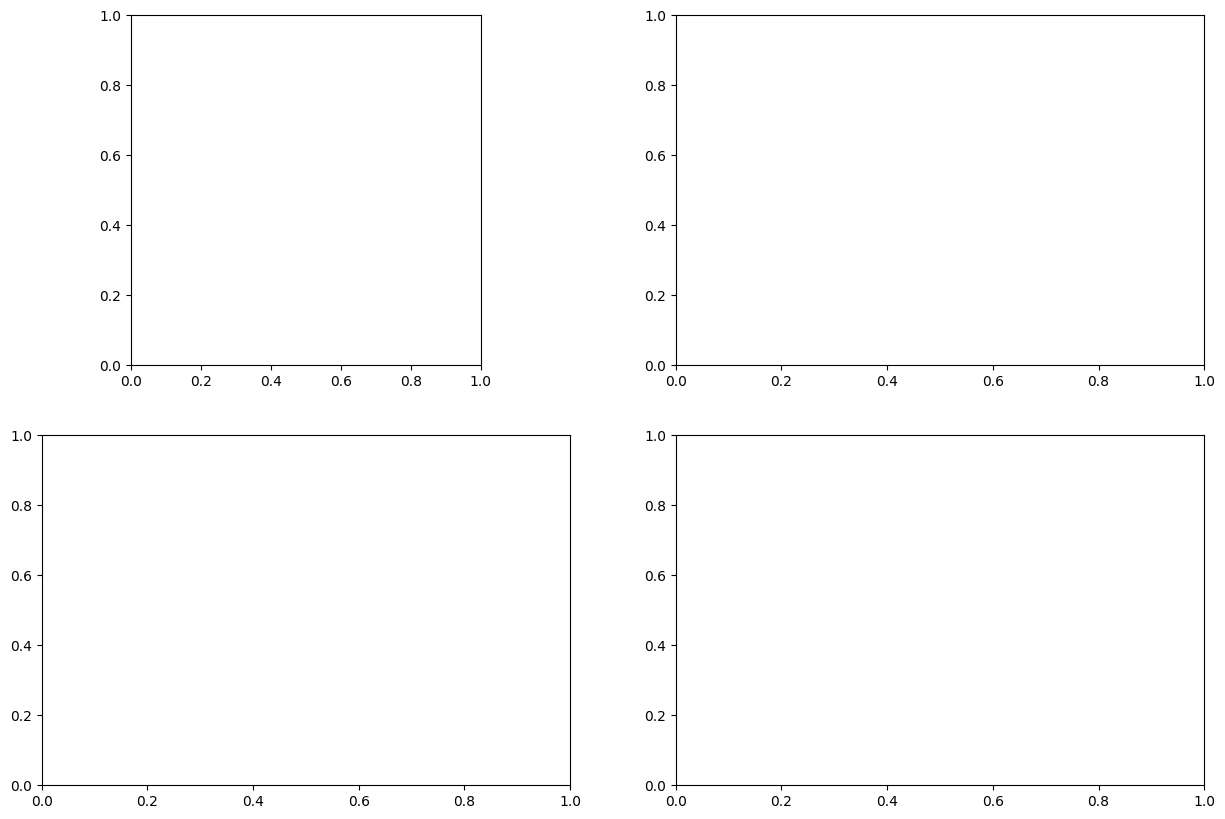

In [111]:
def plot_correlation_matrices(N, M, correlation_matrix):
    
    fig, axes = plt.subplots(N, M, figsize=(15, 10))  # Create a grid of subplots
    
    for i in range(N):
        for j in range(M):
            ax = axes[i, j]  # Get the subplot for this position
            cax = ax.imshow(correlation_matrix[i, j], cmap='coolwarm', vmin=-1, vmax=1)
            ax.set_title(f"Spin ({i},{j})", fontsize=8)
            ax.axis('off')  # Hide axis for better visualization
    
    # Add a colorbar outside the grid
    fig.colorbar(cax, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.02, pad=0.04, label="Spin-Spin Correlation")
    
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for the colorbar
    plt.show()

# Lattice size
N = 2
M = 2

count, bitstrings, minimum_energy, latticelist = lowest_energy(N, M)

for string in latticelist:

    bit_string = lattice_generator(string, N, M) #101011110
    spin_lattice = bit_string.reshape(N, M)
    spin_lattice = np.where(spin_lattice == 0, -1, 1) # Convert 0 to 1 (up spin) and 1 to -1 (down spin)
    print("Spin Lattice:\n", spin_lattice)
    print("\nBit String: ", bit_string)

print(f"The minimum energy found was {minimum_energy}. It was found {count} times.")
print("The given bit string integer(s) were:", latticelist)

correlation_matrix = correlated_spin_probabilities(bitstrings, N, M)
print("\nSpin-Spin Correlation Matrix:")
print(correlation_matrix)

plot_correlation_matrices(N, M, correlation_matrix)
